In [1]:
import yfinance as yf
from datetime import datetime
import numpy as np


vti = yf.Ticker("VTI")
vti.info

{'phone': '800-523-1036',
 'longBusinessSummary': 'The fund employs an indexing investment approach designed to track the performance of the index, which represents approximately 100% of the investable U.S. stock market and includes large-, mid-, small-, and micro-cap stocks. It invests by sampling the index, meaning that it holds a broadly diversified collection of securities that, in the aggregate, approximates the full index in terms of key characteristics.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 283.91,
 'open': 283.97,
 'dayLow': 283.97,
 'dayHigh': 286.3899,
 'regularMarketPreviousClose': 283.91,
 'regularMarketOpen': 283.97,
 'regularMarketDayLow': 283.97,
 'regularMarketDayHigh': 286.3899,
 'trailingPE': 26.90793,
 'volume': 1798063,
 'regularMarketVolume': 1798063,
 'averageVolume': 2914692,
 'averageVolume10days': 3614500,
 'averageDailyVolume10Day': 3614500,
 'bid': 285.26,
 'ask': 286.04,
 'bidSize': 900,
 'askSize': 900,
 'yield': 0.013200001,
 'totalAssets'

In [2]:
end_date = datetime.now().strftime('%Y-%m-%d')
h = vti.history(period='max', end=end_date, interval='1d')
h.index = h.index.tz_convert(None)

h

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2001-06-15 04:00:00,36.427079,36.808275,36.262771,36.584816,1067400,0.0,0.0,0.0
2001-06-18 04:00:00,36.683410,36.749134,36.351509,36.351509,282600,0.0,0.0,0.0
2001-06-19 04:00:00,36.903574,36.913432,36.302206,36.453369,1777600,0.0,0.0,0.0
2001-06-20 04:00:00,36.394244,36.854307,36.394244,36.837875,476000,0.0,0.0,0.0
2001-06-21 04:00:00,36.804986,37.281478,36.722832,37.133602,240400,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-07 04:00:00,282.040009,282.130005,279.540009,280.170013,11465600,0.0,0.0,0.0
2024-10-08 04:00:00,281.279999,282.880005,280.880005,282.529999,2164600,0.0,0.0,0.0
2024-10-09 04:00:00,282.549988,284.739990,282.260010,284.500000,2123800,0.0,0.0,0.0


In [3]:

r = h.rolling(window=30).mean().Close
d = h.Close - r
idxsell = d.idxmax()
print(f"Up {100.0 * (h.loc[idxsell].Close - r[idxsell]) / h.loc[idxsell].Close:.2f}% or {d[idxsell]:.2f}$ on {idxsell}.")

idxbuy = d.idxmin()
print(f"Down {- 100.0 * (h.loc[idxbuy].Close - r[idxbuy]) / h.loc[idxbuy].Close:.2f}% or {d[idxbuy]:.2f}$ on {idxbuy}.")


Up 7.07% or 14.73$ on 2022-08-15 04:00:00.
Down 33.79% or -35.16$ on 2020-03-23 04:00:00.


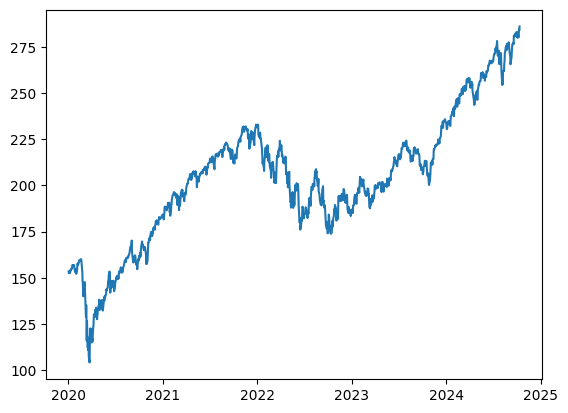

In [4]:
import matplotlib.pyplot as plt
import numpy as np

span = h['2020-01-01':]
plt.plot(span.index, span.Close)
plt.show()


In [5]:
for timestamp in h.head(3).index:
    print(timestamp.strftime('%Y-%m-%d'))



h[h.index > np.datetime64('2024-01-01')]

2001-06-15
2001-06-18
2001-06-19


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 05:00:00,233.275220,234.126554,232.404098,233.255432,4847600,0.0,0.0,0.0
2024-01-03 05:00:00,232.166533,232.374423,230.760845,231.018219,3925500,0.0,0.0,0.0
2024-01-04 05:00:00,230.909308,232.186316,230.315363,230.424255,3681900,0.0,0.0,0.0
2024-01-05 05:00:00,230.354956,232.027927,230.057976,230.770721,3305100,0.0,0.0,0.0
2024-01-08 05:00:00,230.919223,234.176061,230.909314,234.067169,4156600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-07 04:00:00,282.040009,282.130005,279.540009,280.170013,11465600,0.0,0.0,0.0
2024-10-08 04:00:00,281.279999,282.880005,280.880005,282.529999,2164600,0.0,0.0,0.0
2024-10-09 04:00:00,282.549988,284.739990,282.260010,284.500000,2123800,0.0,0.0,0.0


In [30]:


def with_returns(since: np.datetime64 = None):
    end_value = h.iloc[-1:].Close[0]
    ret = 100.0 * (end_value - h.Close) / h.Close
    if since:
        return h[h.index >= since].copy().join(ret.rename('Returns'))
    else:
        return h.copy().join(ret.rename('Returns'))
    
x = with_returns(np.datetime64('2020-01-01'))
plt.plot(x.index, x.Returns)
plt.show()


/tmp/ipykernel_4388/296152440.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = h.iloc[-1:].Close[0]


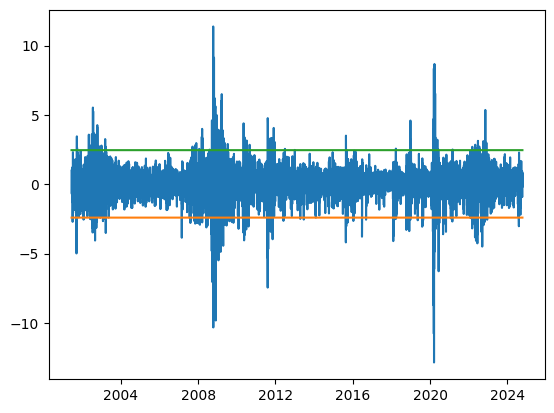

np.float64(0.027692305206382488)

In [49]:
def cycle_count():
    change = 100.0 * (h.Close - h.shift(1).Close) / h.Close
    return h.copy().join(change.rename('Change'))

x = cycle_count()
minstd = x.Change.mean() - 2 * x.Change.std()
maxstd = x.Change.mean() + 2 * x.Change.std()
plt.plot(x.index, x.Change, 
         x.index, np.repeat(minstd, len(x)),
         x.index, np.repeat(maxstd, len(x)))
plt.show()

x.Change.mean()